In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import Wildfire Data and Create Fire Dataframe
fire_df = pd.read_csv("FL2.csv")


In [3]:
# Convert Lat/Long to String
fire_df['latitude'] = fire_df['latitude'].astype('str')
fire_df['longitude'] = fire_df['longitude'].astype('str') 

In [4]:
# Check Data Types
fire_df.dtypes

fire_year          int64
district          object
unit              object
fire_number       object
fire_name         object
legal             object
latitude          object
longitude         object
fuel_model        object
county            object
report_date       object
general_cause     object
odf_acres        float64
total_acres      float64
dtype: object

In [5]:
# Alt Function to convert DMS to Decimal

#def dms_to_dd(d, m, s):
    #dd = d + float(m)/60 + float(s)/3600
    #return dd

# Converting Lat/Long DMS to Decimal
pattern = r'(?P<d>[\d\.]+).*?(?P<m>[\d\.]+).*?(?P<s>[\d\.]+)'

#Lat
dms = fire_df['latitude'].str.extract(pattern).astype(float)
fire_df['Latitude'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

#Long  
dms = fire_df['longitude'].str.extract(pattern).astype(float)
fire_df['Longitude'] = dms['d'] + dms['m'].div(60) + dms['s'].div(3600)

fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,latitude,longitude,fuel_model,county,report_date,general_cause,odf_acres,total_acres,Latitude,Longitude
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,"45° 23' 19.92""","-123° 37' 2.27""",R,Tillamook,7/7/21 9:09,Recreationist,0.01,0.01,45.388867,123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,"45° 4' 21.7""","-123° 56' 52.4""",G,Tillamook,7/16/21 11:32,Equipment Use,0.10,0.10,45.072694,123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,"45° 42' 25.98""","-123° 39' 47.4""",K,Tillamook,7/31/21 17:19,Lightning,0.10,0.10,45.707217,123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,"45° 28' 35.4""","-123° 58' 7.68""",H,Tillamook,8/4/21 22:50,Recreationist,0.59,0.59,45.476500,123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,"45° 33' 59.21""","-123° 37' 39.6""",J,Tillamook,8/11/21 2:48,Under Invest,74.00,74.00,45.566447,123.627667


In [6]:
# Convert all Longtiude to Negative
fire_df['Longitude'] *= -1

In [7]:
# Drop DMS Lat/Long
fire_df = fire_df.drop(['latitude', 'longitude', "odf_acres"], axis=1)
# Confirm Dropped Columns
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667


In [8]:
#List all Columns
for col in fire_df.columns:
    print(col)

fire_year
district
unit
fire_number
fire_name
legal
fuel_model
county
report_date
general_cause
total_acres
Latitude
Longitude


In [9]:
# Import LE to convert Fuel Model and General Cause to Numeric Values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting Fuel Model to Numeric
label_encoder = LabelEncoder()
fire_df["fueltype_num"] = label_encoder.fit_transform(fire_df["fuel_model"])
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7


In [10]:
# Converting General Cause to Numeric 
label_encoder = LabelEncoder()
fire_df["generalCause_num"] = label_encoder.fit_transform(fire_df["general_cause"])
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,8
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,8
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10


In [11]:
# Drop the null columns where all values are null
fire_df = fire_df.dropna(axis='columns', how='all')

# Drop the null rows
fire_df = fire_df.dropna()
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
0,2021,51 - Tillamook,Tillamook,1,GRAVEL PIT,T2S R8W S13 SESW,R,Tillamook,7/7/21 9:09,Recreationist,0.01,45.388867,-123.617297,10,8
1,2021,51 - Tillamook,Tillamook,11,101 on 101,T6S R10W S7 NENE,G,Tillamook,7/16/21 11:32,Equipment Use,0.10,45.072694,-123.947889,4,2
2,2021,51 - Tillamook,Tillamook,23,Lost Creek,T3N R8W S28 SESE,K,Tillamook,7/31/21 17:19,Lightning,0.10,45.707217,-123.663167,8,4
3,2021,51 - Tillamook,Tillamook,26,Larson Creek Fire,T1S R11W S24 NENE,H,Tillamook,8/4/21 22:50,Recreationist,0.59,45.476500,-123.968800,5,8
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10


In [12]:
# Drop All Columns where Total Acres is less then 1
fire_df.drop(fire_df[fire_df.total_acres < 1].index, inplace=True)
fire_df.head(20)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1
51,2021,53 - Forest Grove,Columbia City,72,Powerline #1,T4N R3W S28 NWSW,H,Columbia,6/4/21 18:39,Arson,6.13,45.800206,-123.068728,5,0
74,2021,55 - West Oregon,Dallas,28,Sample,T8S R6W S16 SENW,F,Polk,4/1/21 15:02,Debris Burning,1.60,44.876667,-123.432167,3,1
77,2021,55 - West Oregon,Dallas,30,Applegate,T7S R5W S31 NWNE,J,Polk,4/13/21 11:14,Debris Burning,9.10,44.925992,-123.342003,7,1
81,2021,55 - West Oregon,Toledo,33,229 Field Fire,T9S R10W S7 SENW,L,Lincoln,9/2/21 14:34,Smoking,2.84,44.806825,-123.958983,9,9
87,2021,55 - West Oregon,Dallas,40,Oakdale Rd.,T7S R5W S31 SWSW,L,Polk,9/24/21 16:58,Debris Burning,1.15,44.912889,-123.355944,9,1


In [13]:
# Set and Classify Fire Sizes
fire_df.loc[fire_df['total_acres'] <= 10, 'fire_severity'] = 1
fire_df.loc[(fire_df['total_acres'] > 10) & (fire_df['total_acres'] <= 100), 'fire_severity'] = 2
fire_df.loc[fire_df['total_acres'] > 100, 'fire_severity'] = 3

In [14]:
fire_df.head(5)

,fire_year,district,unit,fire_number,fire_name,legal,fuel_model,county,report_date,general_cause,total_acres,Latitude,Longitude,fueltype_num,generalCause_num,fire_severity
4,2021,51 - Tillamook,Tillamook,30,Cedar Butte,T1N R8W S14 SWSE,J,Tillamook,8/11/21 2:48,Under Invest,74.00,45.566447,-123.627667,7,10,2.0
5,2021,51 - Tillamook,Tillamook,37,Nedonna Beach Fire,T2N R10W S17 SWNW,J,Tillamook,8/29/21 13:41,Recreationist,1.08,45.654833,-123.939472,7,8,1.0
12,2021,52 - Astoria,Astoria,24,Tracer,T8N R10W S32 NESE,L,Clatsop,8/25/21 18:50,Miscellaneous,15.00,46.131819,-123.945183,9,5,2.0
32,2021,53 - Forest Grove,Columbia City,54,East Meissner #1,T5N R2W S9 NENW,H,Columbia,9/6/21 15:11,Miscellaneous,1.40,45.939139,-122.942167,5,5,1.0
47,2021,53 - Forest Grove,Columbia City,67,Lewis Rd. #1,T7N R2W S21 NWNW,J,Columbia,5/6/21 10:28,Debris Burning,2.00,46.080889,-122.947861,7,1,1.0


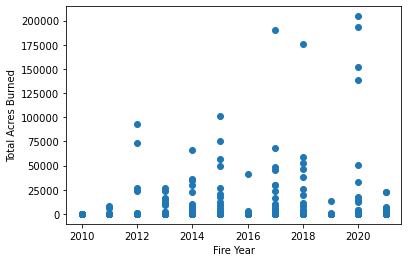

In [15]:
# Linear Regression ML Testing - Relationships
from sklearn.linear_model import LinearRegression
plt.scatter(fire_df.fire_year, fire_df.total_acres)
plt.xlabel('Fire Year')
plt.ylabel('Total Acres Burned')
plt.show()

In [16]:
X = fire_df.fire_year.values.reshape(-1, 1)

In [17]:
X[:5]

array([[2021],
       [2021],
       [2021],
       [2021],
       [2021]])

In [18]:
X.shape

(2021, 1)

In [19]:
y = fire_df.total_acres

In [20]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(2021,)


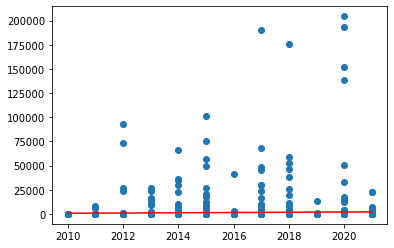

In [21]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

In [ ]:
columns = [
    "loan_amnt", "int_rate", "installment", "home_ownership",
    "annual_inc", "verification_status", "issue_d", "loan_status",
    "pymnt_plan", "dti", "delinq_2yrs", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "total_acc",
    "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee",
    "recoveries", "collection_recovery_fee", "last_pymnt_amnt", "next_pymnt_d",
    "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq",
    "tot_coll_amt", "tot_cur_bal", "open_acc_6m", "open_act_il",
    "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
    "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc",
    "all_util", "total_rev_hi_lim", "inq_fi", "total_cu_tl",
    "inq_last_12m", "acc_open_past_24mths", "avg_cur_bal", "bc_open_to_buy",
    "bc_util", "chargeoff_within_12_mths", "delinq_amnt", "mo_sin_old_il_acct",
    "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl", "mort_acc",
    "mths_since_recent_bc", "mths_since_recent_inq", "num_accts_ever_120_pd", "num_actv_bc_tl",
    "num_actv_rev_tl", "num_bc_sats", "num_bc_tl", "num_il_tl",
    "num_op_rev_tl", "num_rev_accts", "num_rev_tl_bal_gt_0",
    "num_sats", "num_tl_120dpd_2m", "num_tl_30dpd", "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m", "pct_tl_nvr_dlq", "percent_bc_gt_75", "pub_rec_bankruptcies",
    "tax_liens", "tot_hi_cred_lim", "total_bal_ex_mort", "total_bc_limit",
    "total_il_high_credit_limit", "hardship_flag", "debt_settlement_flag"
]

target = ["fire_risk"]

In [ ]:
# Smote In Progress

from sklearn import linear_model, model_selection, metrics, random_projection
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
label_severity = fire_df['fueltype_num']
train_cols = ['LATITUDE', 'LONGITUDE', 'County','fire_severity']
train_fire_df = fire_df[train_cols]

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = model_selection.train_test_split(train_fire_df, label_severity, test_size= .25)